<a href="https://colab.research.google.com/github/a-smoovy/Interpolation-Methods-Performance/blob/main/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problems:
1. linear function

  $f(x) = 2.1x+7.3$
  - even spaced data:
    
    x = [-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]

    y = [-9.5, -7.4, -5.3, -3.2, -1.1,  1.,   3.1,  5.2, 7.3, 9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22.,  24.1]

  - differently spaced:

    x = [-8.,  -6.,  -5.,  -4.,  -3.,  -2.,5 -2.,  -1.,5  0.,   0.,5  1.,   1.,5  2.,5  3., 4.,   6.,   8.]

    y = [-9.5,  -5.3,  -3.2,  -1.1,   1.,    2.05,  3.1,   4.15,  7.3,   8.35,  9.4,  10.45, 12.55, 13.6,  15.7,  19.9,  24.1 ]

2. parabolic function

  $f(x) = .3x^{2}+2.3x-5.2$
  - even space data:

    x = [-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]

    y = [-4.4, -6.6, -8.2, -9.2, -9.6, -9.4, -8.6, -7.2, -5.2, -2.6,  0.6,  4.4,  8.8, 13.8, 19.4, 25.6, 32.4]

  - differently spaced:

    x = [-8, -6, -5, -4, -3, -2.5, -2, -1.5, -1, 0, 0.75, 1.5, 2.5, 4, 8]

    y = [-4.4,     -8.2,     -9.2,     -9.6,     -9.4,     -9.075,   -8.6,     -7.975, -7.2,     -5.2,     -3.30625, -1.075,    2.425,    8.8,     32.4    ]
3. oscillating function

  $f(x) = 3.3\sin\left(2.3x\right)+2.2\cos\left(x\right)$
  - even space data:

    x = [-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]

    y = [ 1.11396648,  2.91942064, -1.00182108,  3.51304898, -2.17355268, -4.08683472, 2.36365727, -1.27216213,  2.2,         3.64949227, -4.19470335, -0.26913227, -0.70247925, -2.26493537,  5.22657034,  0.39774928, -1.75416663]

  - differently spaced:

    x = [-8, -6.5, -5, -4.5, -3, -2.25, -1, -0.5, 0, 0.5, 1.25, 2, 3.5, 5, 6, 8]

    y = [ 1.11396648, -0.1200715,   3.51304898,  2.17213868, -4.08683472,  1.57115598, -1.27216213, -1.08143937,  2.2,         4.94280264,  1.56308098, -4.19470335, 1.17659975, -2.26493537,  5.22657034, -1.75416663]

4. exponential functions

  $f(x) = 2.5 e^{0.3x}-1$

  - even space data:

    x = [-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]

    y = [-7.73205117e-01, -6.93858929e-01, -5.86752779e-01 -4.42174600e-01 -2.47014470e-01  1.64241494e-02  3.72029090e-01  8.52045552e-01 1.50000000e+00  2.37464702e+00  3.55529700e+00  5.14900778e+00 7.30029231e+00  1.02042227e+01  1.41241187e+01  1.94154248e+01 2.65579410e+01]

  - differently spaced:
    x = [-8, -6.5, -5, -4.25, -3, -2, -1.5, -1, -0.25, 0, 0.5, 1.25, 2, 3, 5, 8]

    y = [-7.73205117e-01, -6.44314821e-01, -4.42174600e-01, -3.01422579e-01, 1.64241494e-02,  3.72029090e-01,  5.94070379e-01,  8.52045552e-01, 1.31935872e+00,  1.50000000e+00,  1.90458561e+00,  2.63747854e+00, 3.55529700e+00,  5.14900778e+00 , 1.02042227e+01 , 2.65579410e+01]'''

Interpolations:
1. Cubic
2. Chebychev
3. Lagrange


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def not_a_knot_spline(x_values, y_values):
    """
    Compute the not-a-knot cubic spline interpolation coefficients.

    This function calculates the coefficients b, c, and d for the not-a-knot cubic spline
    interpolation based on the given x and y values.

    Parameters:
    - x_values: List or array of x-values defining the interpolation intervals.
    - y_values: List or array of corresponding y-values for the interpolation intervals.

    Returns:
    - b, c, d: Coefficients of the not-a-knot cubic spline interpolation.
      - b: Coefficients for linear terms.
      - c: Coefficients for quadratic terms.
      - d: Coefficients for cubic terms.
    """

    interval_amount = len(x_values) - 1
    x_difference = np.diff(x_values)
    slopes = np.diff(y_values) / x_difference
    second_deriv = np.zeros(interval_amount)
    for i in range(1, interval_amount):
        second_deriv[i] = 3 * (slopes[i] - slopes[i - 1])

    lower_diag = np.zeros(interval_amount + 1)
    upper_diag = np.zeros(interval_amount + 1)
    right_vect = np.zeros(interval_amount + 1)
    lower_diag[0] = 1
    upper_diag[0] = 0
    right_vect[0] = 0

    for i in range(1, interval_amount):
        lower_diag[i] = 2 * (x_values[i + 1] - x_values[i - 1]) - x_difference[i - 1] * upper_diag[i - 1]
        upper_diag[i] = x_difference[i] / lower_diag[i]
        right_vect[i] = (second_deriv[i] - x_difference[i - 1] * right_vect[i - 1]) / lower_diag[i]
    lower_diag[interval_amount] = 1
    right_vect[interval_amount] = 0
    c = np.zeros(interval_amount + 1)
    b = np.zeros(interval_amount)
    d = np.zeros(interval_amount)
    for j in range(interval_amount - 1, -1, -1):
        c[j] = right_vect[j] - upper_diag[j] * c[j + 1]
        b[j] = slopes[j] - x_difference[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * x_difference[j])
    return b, c, d

In [2]:
def evaluate_spline(x_values, y_values, x, b, c, d):
    """
    Evaluate the cubic spline interpolation at a given point x.

    Parameters:
    - x_values: List or array of x-values defining the interpolation intervals.
    - y_values: List or array of corresponding y-values for the interpolation intervals.
    - x: The point at which to evaluate the spline.
    - b, c, d: Coefficients of the cubic spline interpolation.

    Returns:
    - y: The interpolated y-value at the point x using the cubic spline.
    """

    interval_amount = len(x_values) - 1
    idx = np.searchsorted(x_values, x)

    if idx == 0:
        idx = 1
    elif idx == len(x_values):
        idx -= 1

    y = y_values[idx - 1] + b[idx - 1] * (x - x_values[idx - 1]) + \
        c[idx - 1] * (x - x_values[idx - 1]) ** 2 + \
        d[idx - 1] * (x - x_values[idx - 1]) ** 3
    return y

In [3]:
def lagrange_interpolation(x_values, y_values, x):
    """
    Evaluates the LaGrange Polynomial at a given point x.

    Parameters:
    - x_values: List or array of x-values defining the interpolation intervals.
    - y_values: List or array of corresponding y-values for the interpolation intervals.
    - x: The point at which to evaluate the LaGrange equation.

    Returns:
    - result: The interpolated y-value at the point x using LaGrange.
    """
    interval_amount = len(x_values)
    result = 0.0

    for i in range(interval_amount):
        term = y_values[i]
        for j in range(interval_amount):
            if j != i:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term

    return result

In [4]:
def chebychev_nodes( n, a, b):
    """
    Compute the Chebychev interpolation for the given function at x.

    Parameters:
    - function: Function provided as lambda function
    - n: Order of Chebyshev polynomial
    - a: minimum of range of x
    - b: maximum of range of x
    """

    k = np.array(range(n))
    cheb_nodes = (b+a) / 2 + (b - a) * np.cos((2 * k + 1) * np.pi / (2 * n)) / 2
    return np.flip(cheb_nodes)

def chebychev_interpolation(function, n, a, b, x):
    """
    Compute the Chebychev interpolation for the given function at x.

    Parameters:
    - function: Function provided as lambda function
    - n: Order of Chebyshev polynomial
    - a: minimum of range of x
    - b: maximum of range of x
    - x: The point at which to evaluate the polynomial
    """

    k = np.array(range(n))
    cheb_nodes = (b+a) / 2 + (b - a) * np.cos((2 * k + 1) * np.pi / (2 * n)) / 2
    y_values = function(cheb_nodes)
    return lagrange_interpolation(cheb_nodes, y_values, x)

In [5]:
def norm_error(true_values, interp_values):
  """
    Calculates the maximum norm of the error between a true value and an interpolated value.

    Parameters:
    - true_value (array-like): Array or list containing the true values.
    - interp_value (array-like): Array or list containing the interpolated values.

    Returns:
    float: Maximum norm of the error between the true value and the interpolated value.
  """
  error = np.abs(true_values - interp_values)
  max_error = np.max(error)
  return max_error

def RMSE(true_values, interp_values):
  """
    Calculates the root mean squared error between a true value and an interpolated value.

    Parameters:
    - true_value (array-like): Array or list containing the true values.
    - interp_value (array-like): Array or list containing the interpolated values.

    Returns:
    float: Root mean squared error between the true value and the interpolated value.
  """
  n = len(true_values)
  return np.sqrt(np.sum((true_values-interp_values)**2)/n)

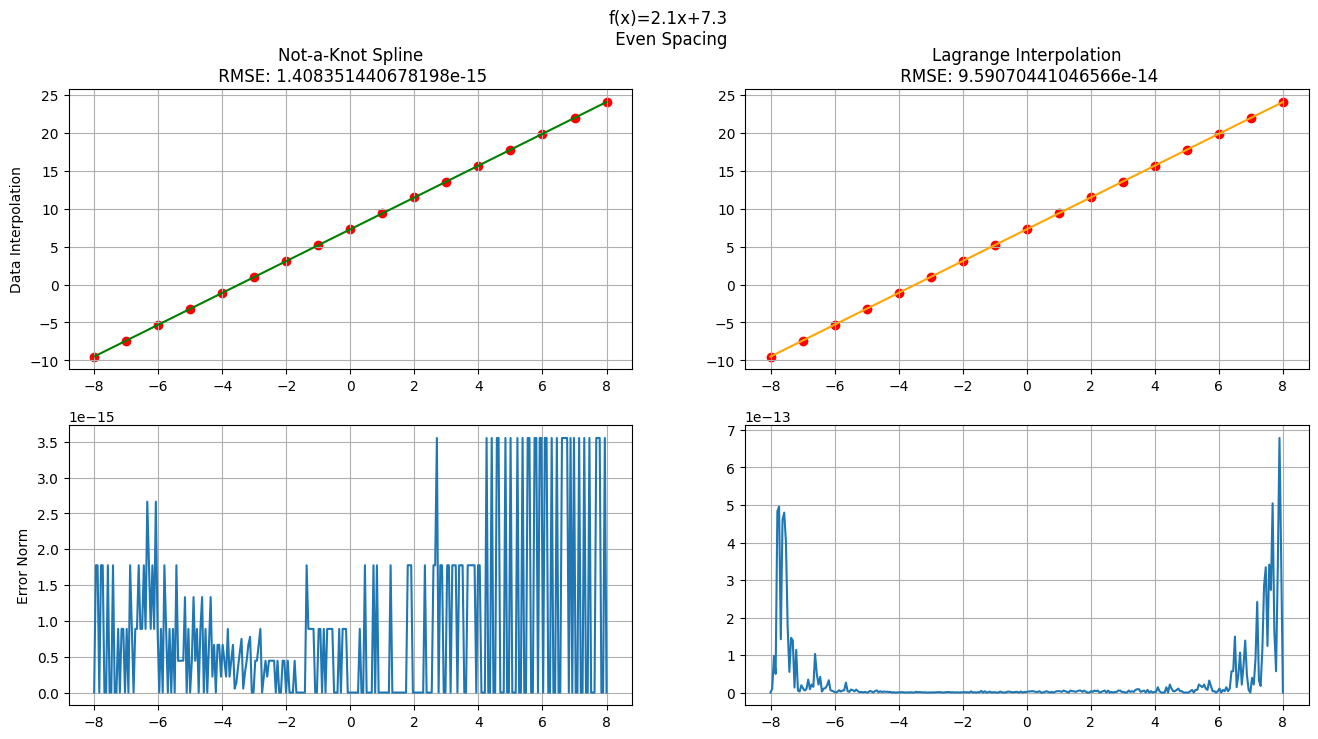

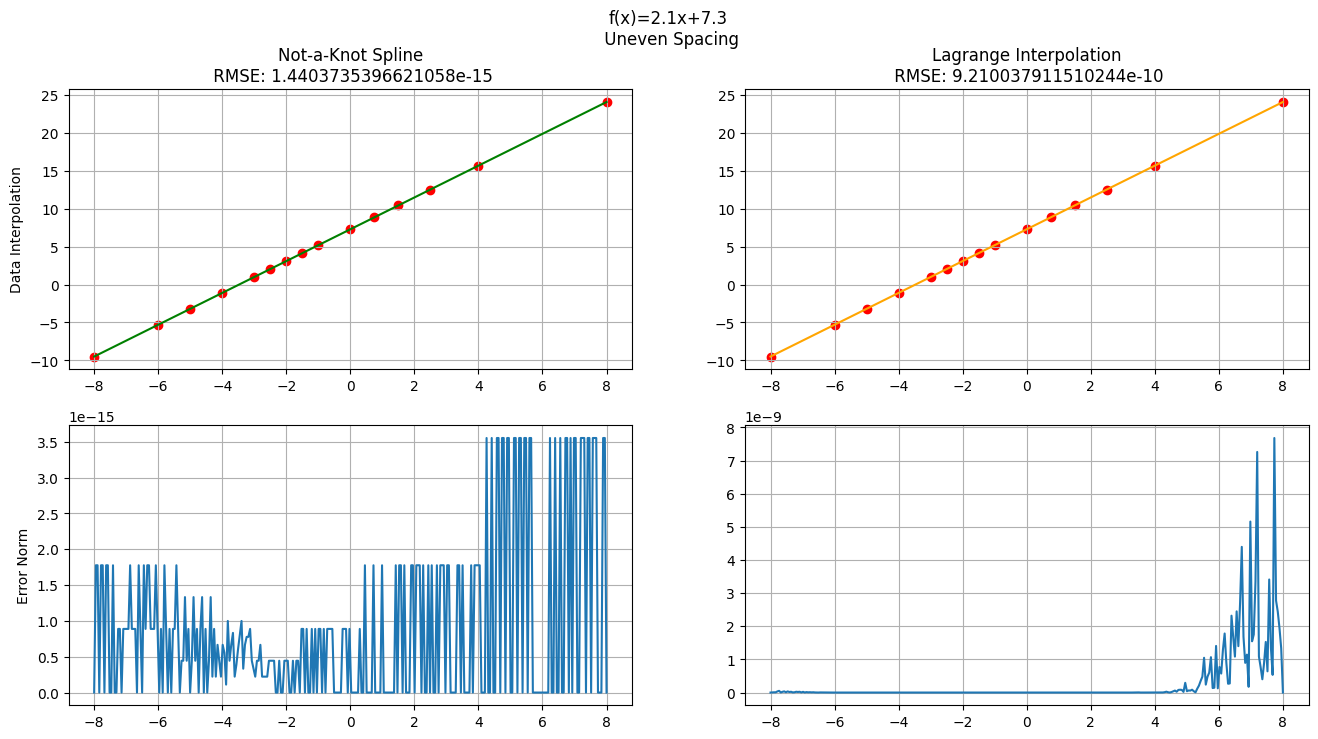

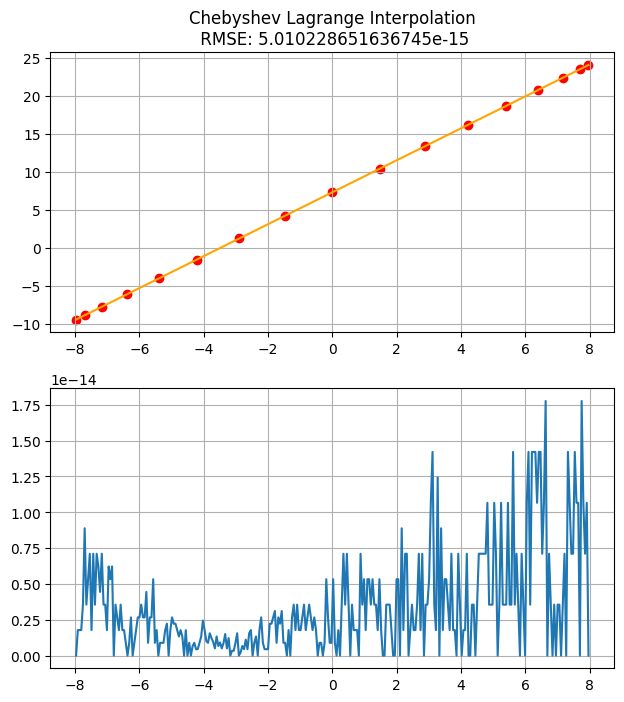

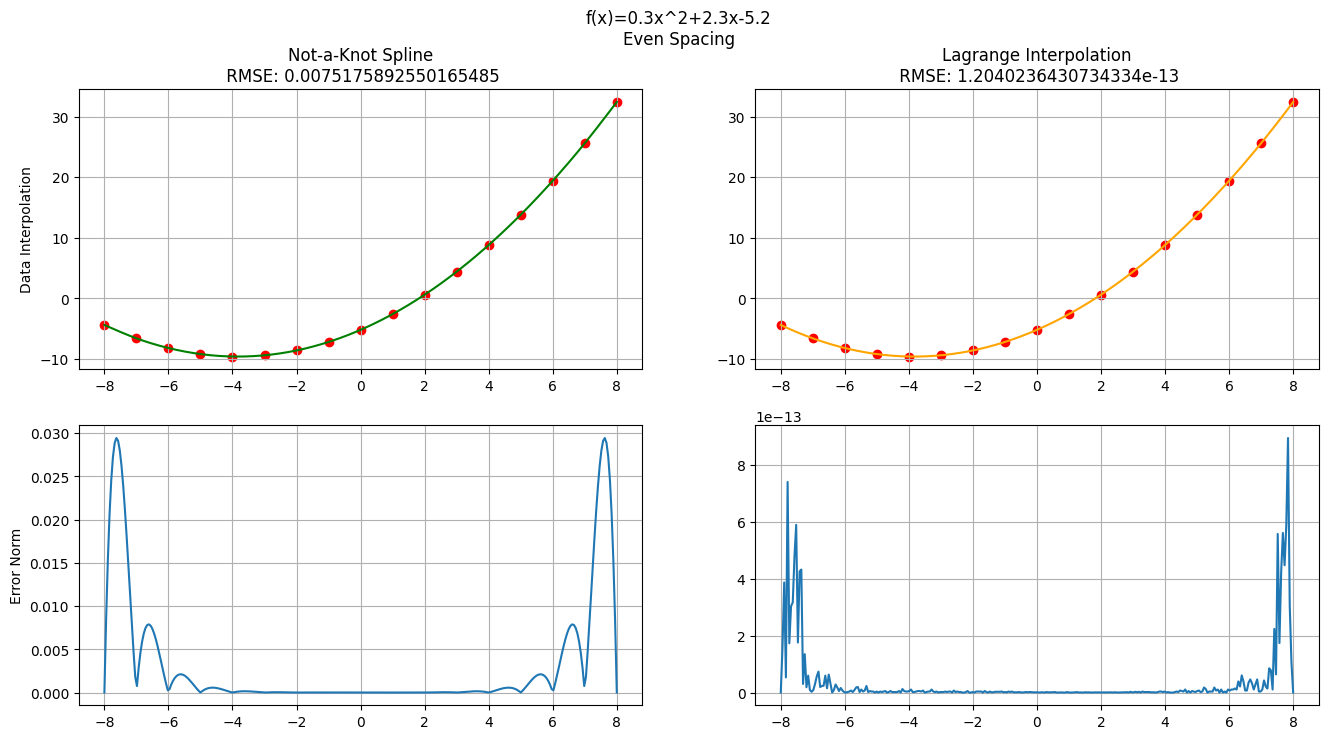

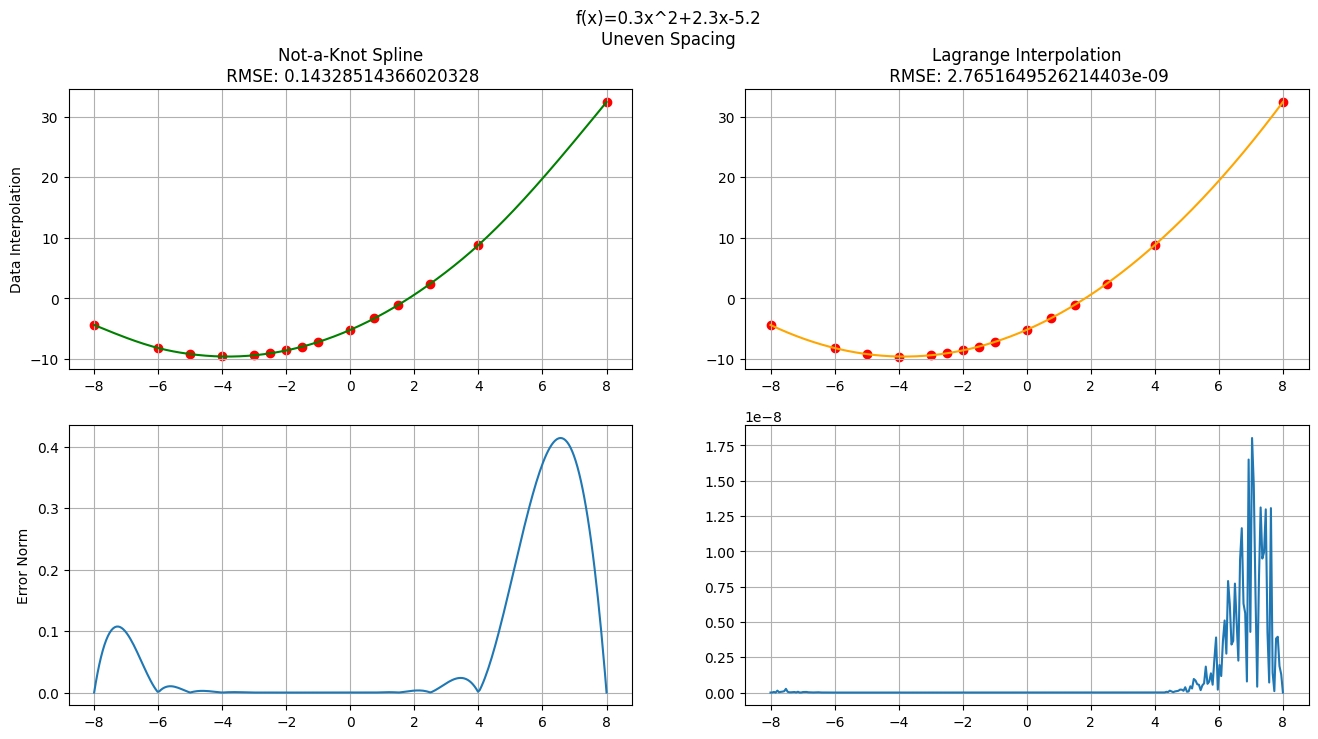

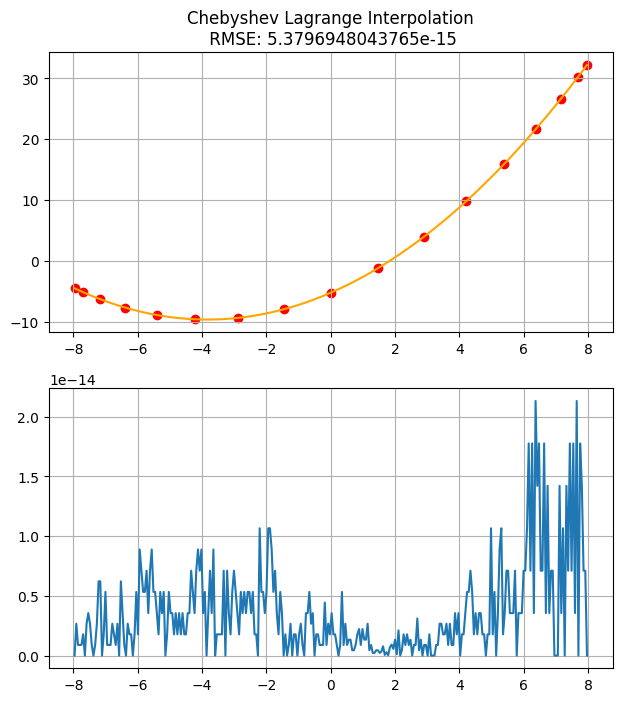

In [6]:
f_1 = lambda x: 7.3 + 2.1 * x
f_2 = lambda x: -5.2 + 2.3 * x + 0.3 * x ** 2
f_3 = lambda x: 3.3 * np.sin(2.3 * x)+2.2 * np.cos(x)
f_4 = lambda x: 2.5 * np.exp(0.3 * x) - 1
f_5 = lambda x: np.log(x)

even_x = np.array(range(-8,9))
uneven_x = np.array([-8, -6, -5, -4, -3, -2.5, -2, -1.5, -1, 0, 0.75, 1.5, 2.5, 4, 8])
cheby_x = chebychev_nodes(17,-8,8)

# function 1

# even spacing

b, c, d = not_a_knot_spline(even_x, f_1(even_x))
even_x_spline_1 = np.linspace(min(even_x), max(even_x), 300)
even_y_spline_1 = np.array([evaluate_spline(even_x, f_1(even_x), x, b, c, d) for x in even_x_spline_1])


even_x_LG_1 = np.linspace(min(even_x), max(even_x), 300)
even_y_LG_1 = np.array([lagrange_interpolation(even_x, f_1(even_x), x) for x in even_x_LG_1])

# plot
figure, axis = plt.subplots(2, 2, figsize=(16,8))
axis[0][0].scatter(even_x, f_1(even_x), color='red')
axis[0][1].scatter(even_x, f_1(even_x), color='red')
axis[0][0].plot(even_x_spline_1, even_y_spline_1, color='green')
axis[0][1].plot(even_x_LG_1, even_y_LG_1,color = 'orange')
axis[1][0].plot(even_x_spline_1,np.abs(even_y_spline_1 - f_1(even_x_spline_1)))
axis[1][1].plot(even_x_LG_1, np.abs(even_y_LG_1 - f_1(even_x_LG_1)))


figure.suptitle('f(x)=2.1x+7.3\n Even Spacing')
axis[0,0].set_ylabel('Data Interpolation')
axis[1, 0].set_ylabel('Error Norm')
axis[0][0].set_title(f'Not-a-Knot Spline\n RMSE: {RMSE(f_1(even_x_spline_1),even_y_spline_1)}')
axis[0][1].set_title(f'Lagrange Interpolation\n RMSE: {RMSE(f_1(even_x_LG_1),even_y_LG_1)}')
axis[0][0].grid(True)
axis[0][1].grid(True)
axis[1][0].grid(True)
axis[1][1].grid(True)
figure.show()


# uneven spacing

b, c, d = not_a_knot_spline(uneven_x, f_1(uneven_x))


uneven_x_spline_1 = np.linspace(min(uneven_x), max(uneven_x), 300)
uneven_y_spline_1 = np.array([evaluate_spline(uneven_x, f_1(uneven_x), x, b, c, d) for x in uneven_x_spline_1])
uneven_x_LG_1 = np.linspace(min(uneven_x), max(uneven_x), 300)
uneven_y_LG_1 = np.array([lagrange_interpolation(uneven_x, f_1(uneven_x), x) for x in uneven_x_LG_1])


figure, axis = plt.subplots(2, 2, figsize=(16,8))

axis[0][0].scatter(uneven_x, f_1(uneven_x), color='red', label='Original Data')
axis[0][1].scatter(uneven_x, f_1(uneven_x), color='red')
axis[0][0].plot(uneven_x_spline_1, uneven_y_spline_1, label='Not-a-Knot Spline Interpolation', color='green')
axis[0][1].plot(uneven_x_LG_1, uneven_y_LG_1, label='LaGrange Interpolation',color = 'orange')
axis[1][0].plot(uneven_x_spline_1,np.abs(uneven_y_spline_1 - f_1(uneven_x_spline_1)))
axis[1][1].plot(uneven_x_LG_1, np.abs(uneven_y_LG_1 - f_1(uneven_x_LG_1)))

figure.suptitle('f(x)=2.1x+7.3\n Uneven Spacing')
axis[0,0].set_ylabel('Data Interpolation')
axis[1, 0].set_ylabel('Error Norm')
axis[0][0].set_title(f'Not-a-Knot Spline\n RMSE: {RMSE(f_1(uneven_x_spline_1), uneven_y_spline_1)}')
axis[0][1].set_title(f'Lagrange Interpolation\n RMSE: {RMSE(f_1(uneven_x_LG_1), uneven_y_LG_1)}')
axis[0][0].grid(True)
axis[0][1].grid(True)
axis[1][0].grid(True)
axis[1][1].grid(True)
figure.show()

# cheby nodes

b, c, d = not_a_knot_spline(cheby_x, f_1(cheby_x))
cheby_x_spline_1 = np.linspace(min(cheby_x), max(cheby_x), 300)
cheby_y_spline_1 = np.array([evaluate_spline(cheby_x, f_1(cheby_x), x, b, c, d) for x in cheby_x_spline_1])
cheby_x_LG_1= np.linspace(min(cheby_x), max(cheby_x), 300)
cheby_y_LG_1 = np.array([lagrange_interpolation(cheby_x, f_1(cheby_x), x) for x in cheby_x_LG_1])


figure, axis = plt.subplots(2, 2, figsize=(16,8))

axis[0][0].scatter(cheby_x, f_1(cheby_x), color='red', label='Original Data')
axis[0][1].scatter(cheby_x, f_1(cheby_x), color='red')
axis[0][0].plot(cheby_x_spline_1, cheby_y_spline_1, label='Not-a-Knot Spline Interpolation', color='green')
axis[0][1].plot(cheby_x_LG_1, cheby_y_LG_1, label='LaGrange Interpolation',color = 'orange')
axis[1][0].plot(cheby_x_spline_1,np.abs(cheby_y_spline_1 - f_1(cheby_x_spline_1)))
axis[1][1].plot(cheby_x_LG_1, np.abs(cheby_y_LG_1 - f_1(cheby_x_LG_1)))

axis[0][0].set_visible(False)
axis[1][0].set_visible(False)


axis[0,0].set_ylabel('Data Interpolation')
axis[1, 0].set_ylabel('Error Norm')
axis[0][0].set_title(f'Not-a-Knot Spline\n RMSE: {RMSE(f_1(cheby_x_spline_1),cheby_y_spline_1)}')
axis[0][1].set_title(f'Chebyshev Lagrange Interpolation\n RMSE: {RMSE(f_1(cheby_x_LG_1),cheby_y_LG_1)}')
axis[0][0].grid(True)
axis[0][1].grid(True)
axis[1][0].grid(True)
axis[1][1].grid(True)
figure.show()

# function 2

# even spacing

b, c, d = not_a_knot_spline(even_x, f_2(even_x))
even_x_spline_2 = np.linspace(min(even_x), max(even_x), 300)
even_y_spline_2 = np.array([evaluate_spline(even_x, f_2(even_x), x, b, c, d) for x in even_x_spline_2])
even_x_LG_2 = np.linspace(min(even_x), max(even_x), 300)
even_y_LG_2 = np.array([lagrange_interpolation(even_x, f_2(even_x), x) for x in even_x_LG_2])

figure, axis = plt.subplots(2, 2, figsize=(16,8))

axis[0][0].scatter(even_x, f_2(even_x), color='red', label='Original Data')
axis[0][1].scatter(even_x, f_2(even_x), color='red')
axis[0][0].plot(even_x_spline_2, even_y_spline_2, label='Not-a-Knot Spline Interpolation', color='green')
axis[0][1].plot(even_x_LG_2, even_y_LG_2, label='LaGrange Interpolation',color = 'orange')
axis[1][0].plot(even_x_spline_2, np.abs(even_y_spline_2-f_2(even_x_spline_2)))
axis[1][1].plot(even_x_LG_2, np.abs(even_y_LG_2-f_2(even_x_LG_2)))


figure.suptitle('f(x)=0.3x^2+2.3x-5.2\nEven Spacing')
axis[0,0].set_ylabel('Data Interpolation')
axis[1, 0].set_ylabel('Error Norm')
axis[0][0].set_title(f'Not-a-Knot Spline\n RMSE: {RMSE(f_2(even_x_spline_2),even_y_spline_2)}')
axis[0][1].set_title(f'Lagrange Interpolation\n RMSE: {RMSE(f_2(even_x_LG_2),even_y_LG_2)}')
axis[0][0].grid(True)
axis[0][1].grid(True)
axis[1][0].grid(True)
axis[1][1].grid(True)
figure.show()

# uneven spacing

b, c, d = not_a_knot_spline(uneven_x, f_2(uneven_x))

# cubic spline
uneven_x_spline_2 = np.linspace(min(uneven_x), max(uneven_x), 300)
uneven_y_spline_2 = np.array([evaluate_spline(uneven_x, f_2(uneven_x), x, b, c, d) for x in uneven_x_spline_2])


# lagrange interpolation
uneven_x_LG_2 = np.linspace(min(uneven_x), max(uneven_x), 300)
uneven_y_LG_2 = np.array([lagrange_interpolation(uneven_x, f_2(uneven_x), x) for x in uneven_x_LG_2])

figure, axis = plt.subplots(2, 2, figsize=(16,8))

axis[0][0].scatter(uneven_x, f_2(uneven_x), color='red', label='Original Data')
axis[0][1].scatter(uneven_x, f_2(uneven_x), color='red')
axis[0][0].plot(uneven_x_spline_2, uneven_y_spline_2, label='Not-a-Knot Spline Interpolation', color='green')
axis[0][1].plot(uneven_x_LG_2, uneven_y_LG_2, label='LaGrange Interpolation',color = 'orange')
axis[1][0].plot(uneven_x_spline_2, np.abs(uneven_y_spline_2-f_2(uneven_x_spline_2)))
axis[1][1].plot(uneven_x_LG_2, np.abs(uneven_y_LG_2-f_2(uneven_x_LG_2)))


figure.suptitle('f(x)=0.3x^2+2.3x-5.2\nUneven Spacing')
axis[0,0].set_ylabel('Data Interpolation')
axis[1, 0].set_ylabel('Error Norm')
axis[0][0].set_title(f'Not-a-Knot Spline\n RMSE: {RMSE(f_2(uneven_x_spline_2), uneven_y_spline_2)}')
axis[0][1].set_title(f'Lagrange Interpolation\n RMSE: {RMSE(f_2(uneven_x_LG_2), uneven_y_LG_2)}')
axis[0][0].grid(True)
axis[1][0].grid(True)
axis[0][1].grid(True)
axis[1][1].grid(True)
figure.show()

# cheby spacing

# not a knot parameters
b, c, d = not_a_knot_spline(cheby_x, f_2(cheby_x))

# create not a knot splines
cheby_x_spline_2 = np.linspace(min(cheby_x), max(cheby_x), 300)
cheby_y_spline_2 = np.array([evaluate_spline(cheby_x, f_2(cheby_x), x, b, c, d) for x in cheby_x_spline_2])

# create lagrane interpolation
cheby_x_LG_2= np.linspace(min(cheby_x), max(cheby_x), 300)
cheby_y_LG_2 = np.array([lagrange_interpolation(cheby_x, f_2(cheby_x), x) for x in cheby_x_LG_2])

# plotting
figure, axis = plt.subplots(2, 2, figsize=(16,8))
axis[0][0].scatter(cheby_x, f_2(cheby_x), color='red', label='Original Data')
axis[0][1].scatter(cheby_x, f_2(cheby_x), color='red', label='Original Data')
axis[0][0].plot(cheby_x_spline_2, cheby_y_spline_2, label='Not-a-Knot Spline Interpolation', color='green')
axis[0][1].plot(cheby_x_LG_2, cheby_y_LG_2, label='Chebyshev Interpolation',color = 'orange')
axis[1][0].plot(cheby_x_spline_2, np.abs(cheby_y_spline_2-f_2(cheby_x_spline_2)))
axis[1][1].plot(cheby_x_LG_2, np.abs(cheby_y_LG_2-f_2(cheby_x_LG_2)))

axis[0][0].set_visible(False)
axis[1][0].set_visible(False)

axis[0,0].set_ylabel('Data Interpolation')
axis[1, 0].set_ylabel('Error Norm')
axis[0][0].set_title(f'Not-a-Knot Spline\n RMSE: {RMSE(f_2(cheby_x_spline_2),cheby_y_spline_2)}')
axis[0][1].set_title(f'Chebyshev Lagrange Interpolation\n RMSE: {RMSE(f_2(cheby_x_LG_2),cheby_y_LG_2)}')
axis[0][0].grid(True)
axis[0][1].grid(True)
axis[1][0].grid(True)
axis[1][1].grid(True)
plt.show()


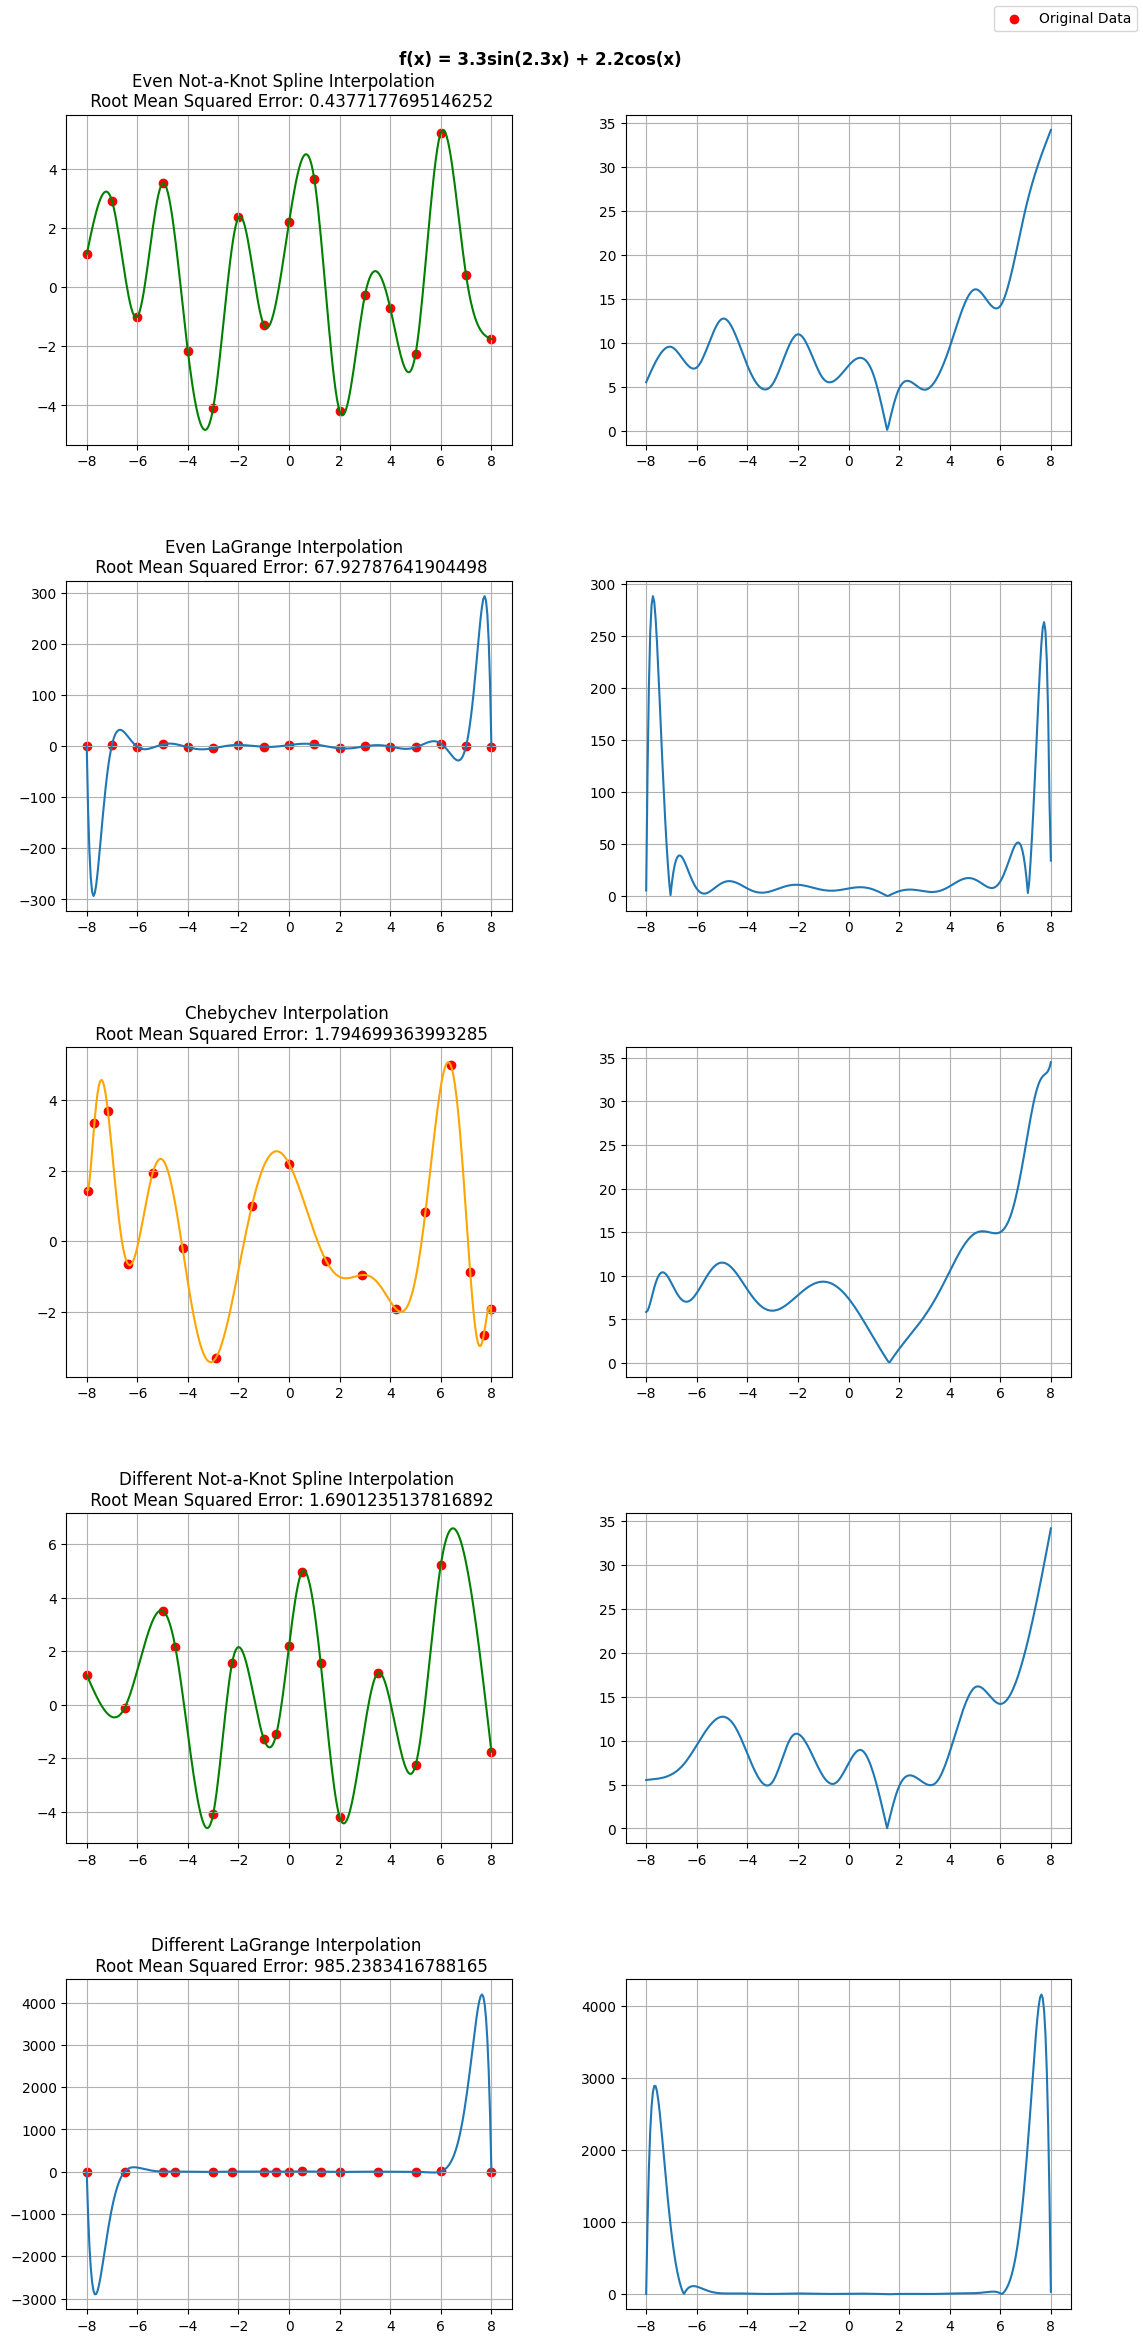

In [7]:
x_even = np.array( [-8., -7., -6., -5., -4., -3., -2., -1., 0., 1., 2., 3., 4., 5., 6., 7., 8.])
y_even = f_3(x_even)
x_odd = np.array([-8., -6.5, -5., -4.5, -3., -2.25, -1., -0.5, 0., 0.5, 1.25, 2., 3.5, 5., 6., 8.])
y_odd = f_3(x_odd)


b_even, c_even, d_even = not_a_knot_spline(x_even, y_even)
b_odd, c_odd, d_odd = not_a_knot_spline(x_odd, y_odd)

x_even_spline = np.linspace(min(x_even), max(x_even), 300)
y_even_spline = np.array([evaluate_spline(x_even, y_even, x, b_even, c_even, d_even) for x in x_even_spline])

x_even_LG = np.linspace(min(x_even), max(x_even), 300)
y_even_LG = np.array([lagrange_interpolation(x_even, y_even, x) for x in x_even_LG])

x_C = np.linspace(min(x_even), max(x_even), 300)
y_C = np.array([chebychev_interpolation(f_3, 17, -8, 8, x) for x in x_C])

x_odd_spline = np.linspace(min(x_odd), max(x_odd), 300)
y_odd_spline = np.array([evaluate_spline(x_odd, y_odd, x, b_odd, c_odd, d_odd) for x in x_odd_spline])

x_odd_LG = np.linspace(min(x_odd), max(x_odd), 300)
y_odd_LG = np.array([lagrange_interpolation(x_odd, y_odd, x) for x in x_odd_LG])


figure, axis = plt.subplots(5, 2, figsize=(12,24))
axis[0][0].scatter(x_even, y_even, color='red', label='Original Data')
axis[1][0].scatter(x_even, y_even, color='red', )
axis[2][0].scatter(chebychev_nodes(17, -8, 8), f_3(chebychev_nodes(17, -8, 8)), color='red', )
axis[3][0].scatter(x_odd, y_odd, color='red', )
axis[4][0].scatter(x_odd, y_odd, color='red', )

axis[0][0].plot(x_even_spline, y_even_spline, color='green')
axis[1][0].plot(x_even_LG, y_even_LG)
axis[2][0].plot(x_C, y_C, color = 'orange')
axis[3][0].plot(x_odd_spline, y_odd_spline, color='green')
axis[4][0].plot(x_odd_LG, y_odd_LG)

axis[0][0].set_title(f'Even Not-a-Knot Spline Interpolation  \n Root Mean Squared Error: {RMSE(f_3(x_even_spline), y_even_spline)}')
axis[1][0].set_title(f'Even LaGrange Interpolation  \n Root Mean Squared Error: {RMSE(f_3(x_even_LG), y_even_LG)}')
axis[2][0].set_title(f'Chebychev Interpolation \n Root Mean Squared Error: {RMSE(f_3(x_C), y_C)}')
axis[3][0].set_title(f'Different Not-a-Knot Spline Interpolation \n Root Mean Squared Error: {RMSE(f_3(x_odd_spline), y_odd_spline)}')
axis[4][0].set_title(f'Different LaGrange Interpolation \n Root Mean Squared Error: {RMSE(f_3(x_odd_LG), y_odd_LG)}')

axis[0][0].grid(True)
axis[1][0].grid(True)
axis[2][0].grid(True)
axis[3][0].grid(True)
axis[4][0].grid(True)

axis[0][1].plot(x_even_spline, np.abs(y_even_spline-f_2(x_even_spline)))
axis[1][1].plot(x_even_LG, np.abs(y_even_LG-f_2(x_even_LG)))
axis[2][1].plot(x_C, np.abs(y_C-f_2(x_C)))
axis[3][1].plot(x_odd_spline, np.abs(y_odd_spline-f_2(x_odd_spline)))
axis[4][1].plot(x_odd_LG, np.abs(y_odd_LG-f_2(x_odd_LG)))

axis[0][1].grid(True)
axis[1][1].grid(True)
axis[2][1].grid(True)
axis[3][1].grid(True)
axis[4][1].grid(True)


figure.legend()
figure.tight_layout(pad=5.0)

figure.suptitle('f(x) = 3.3sin(2.3x) + 2.2cos(x)', weight='bold')

plt.show()

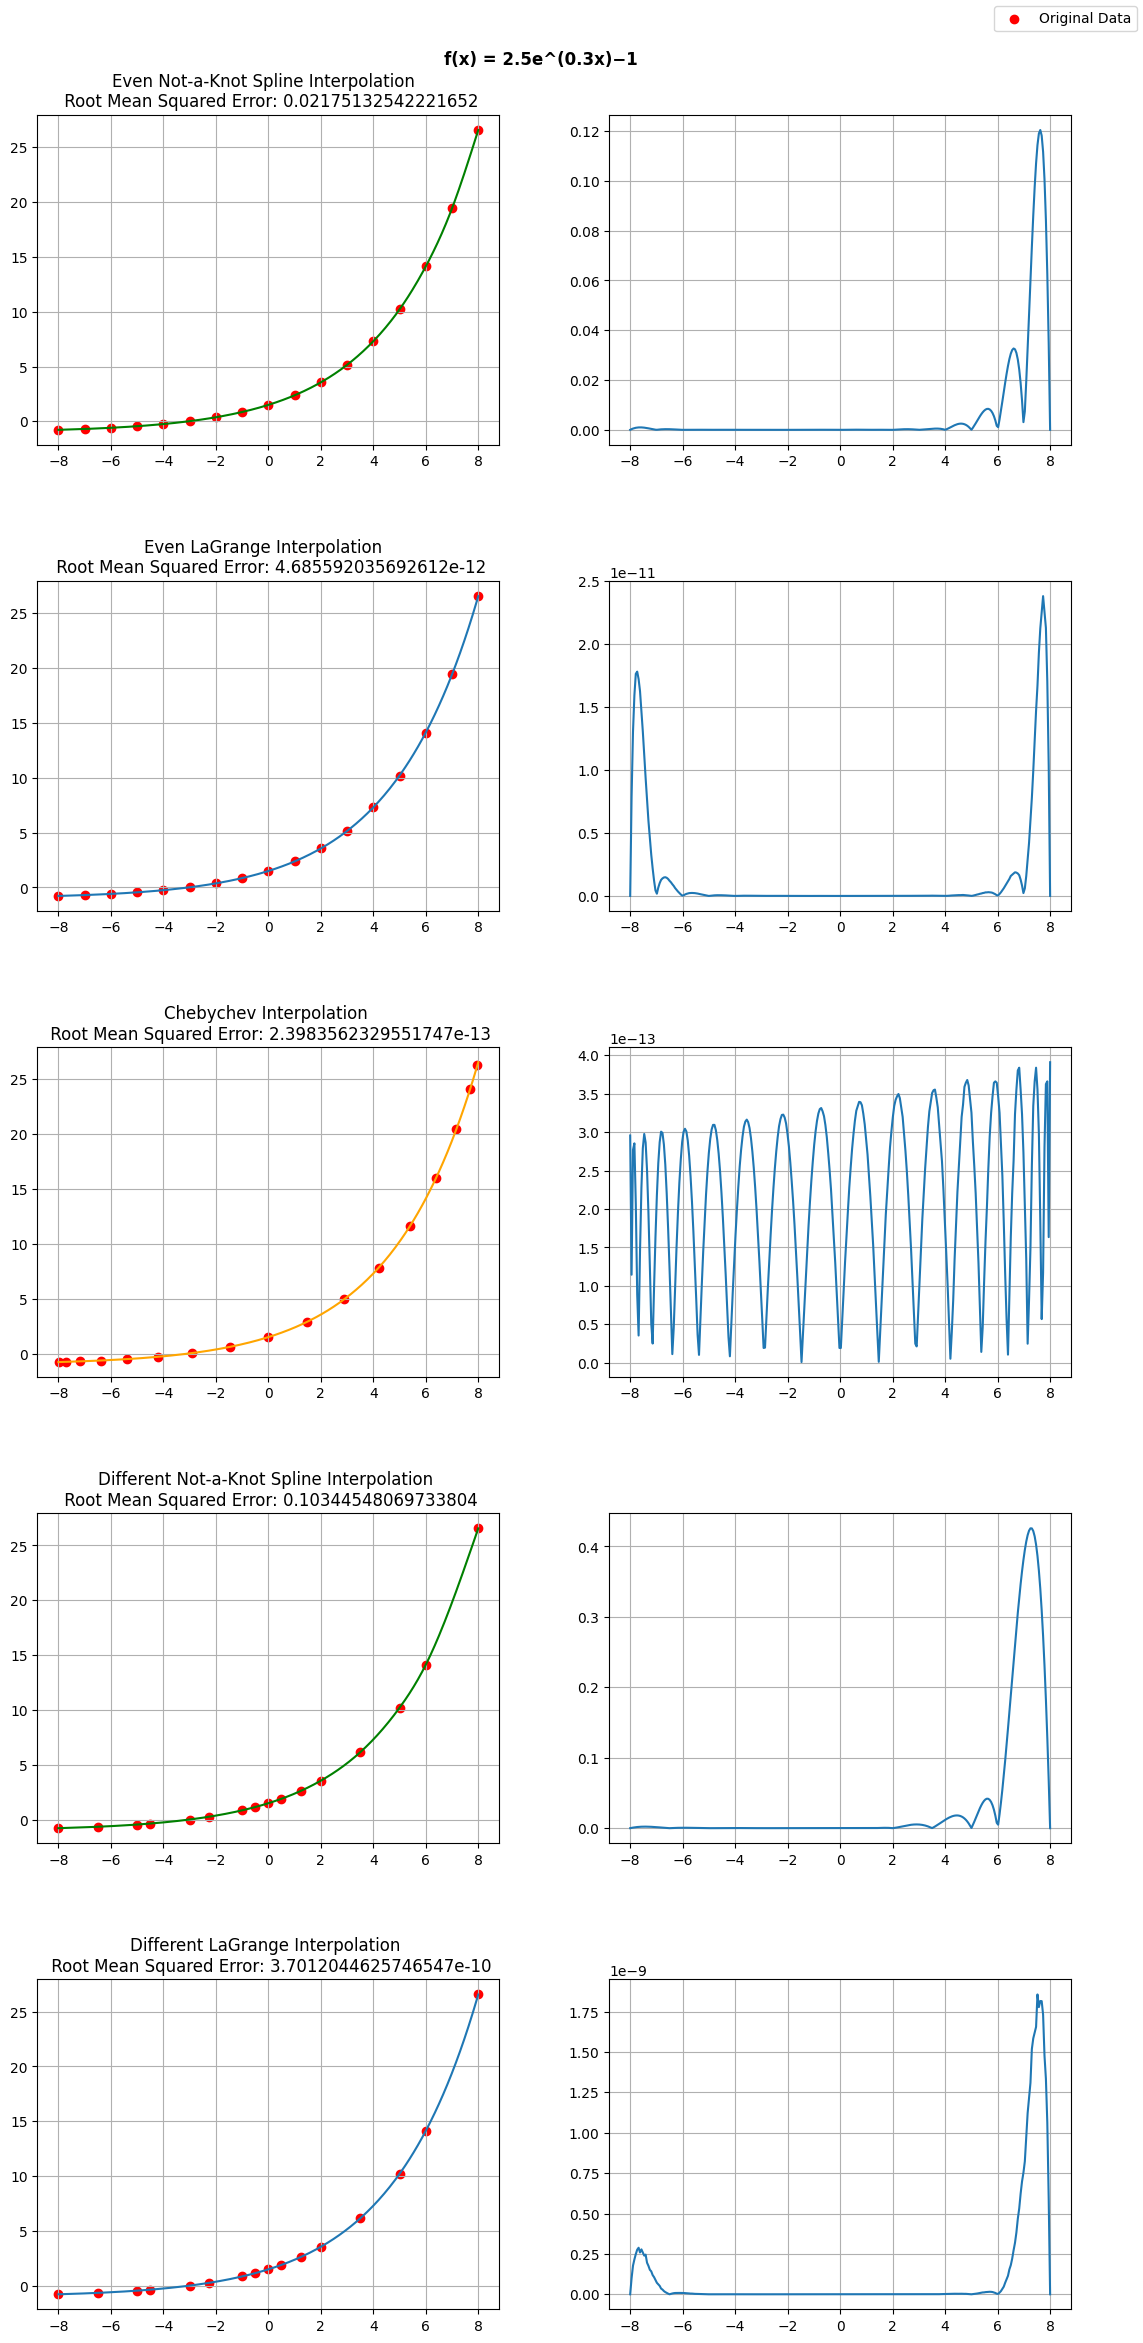

In [8]:
x_even = np.array( [-8., -7., -6., -5., -4., -3., -2., -1., 0., 1., 2., 3., 4., 5., 6., 7., 8.])
y_even = f_4(x_even)
x_odd = np.array([-8., -6.5, -5., -4.5, -3., -2.25, -1., -0.5, 0., 0.5, 1.25, 2., 3.5, 5., 6., 8.])
y_odd = f_4(x_odd)


b_even, c_even, d_even = not_a_knot_spline(x_even, y_even)
b_odd, c_odd, d_odd = not_a_knot_spline(x_odd, y_odd)

x_even_spline = np.linspace(min(x_even), max(x_even), 300)
y_even_spline = np.array([evaluate_spline(x_even, y_even, x, b_even, c_even, d_even) for x in x_even_spline])

x_even_LG = np.linspace(min(x_even), max(x_even), 300)
y_even_LG = np.array([lagrange_interpolation(x_even, y_even, x) for x in x_even_LG])

x_C = np.linspace(min(x_even), max(x_even), 300)
y_C = np.array([chebychev_interpolation(f_4, 17, -8, 8, x) for x in x_C])

x_odd_spline = np.linspace(min(x_odd), max(x_odd), 300)
y_odd_spline = np.array([evaluate_spline(x_odd, y_odd, x, b_odd, c_odd, d_odd) for x in x_odd_spline])

x_odd_LG = np.linspace(min(x_odd), max(x_odd), 300)
y_odd_LG = np.array([lagrange_interpolation(x_odd, y_odd, x) for x in x_odd_LG])


figure, axis = plt.subplots(5, 2, figsize=(12,24))
axis[0][0].scatter(x_even, y_even, color='red', label='Original Data')
axis[1][0].scatter(x_even, y_even, color='red', )
axis[2][0].scatter(chebychev_nodes(17, -8, 8), f_4(chebychev_nodes(17, -8, 8)), color='red', )
axis[3][0].scatter(x_odd, y_odd, color='red', )
axis[4][0].scatter(x_odd, y_odd, color='red', )

axis[0][0].plot(x_even_spline, y_even_spline, color='green')
axis[1][0].plot(x_even_LG, y_even_LG)
axis[2][0].plot(x_C, y_C, color = 'orange')
axis[3][0].plot(x_odd_spline, y_odd_spline, color='green')
axis[4][0].plot(x_odd_LG, y_odd_LG)

axis[0][0].set_title(f'Even Not-a-Knot Spline Interpolation  \n Root Mean Squared Error: {RMSE(f_4(x_even_spline), y_even_spline)}')
axis[1][0].set_title(f'Even LaGrange Interpolation  \n Root Mean Squared Error: {RMSE(f_4(x_even_LG), y_even_LG)}')
axis[2][0].set_title(f'Chebychev Interpolation \n Root Mean Squared Error: {RMSE(f_4(x_C), y_C)}')
axis[3][0].set_title(f'Different Not-a-Knot Spline Interpolation \n Root Mean Squared Error: {RMSE(f_4(x_odd_spline), y_odd_spline)}')
axis[4][0].set_title(f'Different LaGrange Interpolation \n Root Mean Squared Error: {RMSE(f_4(x_odd_LG), y_odd_LG)}')

axis[0][0].grid(True)
axis[1][0].grid(True)
axis[2][0].grid(True)
axis[3][0].grid(True)
axis[4][0].grid(True)

axis[0][1].plot(x_even_spline, np.abs(y_even_spline-f_4(x_even_spline)))
axis[1][1].plot(x_even_LG, np.abs(y_even_LG-f_4(x_even_LG)))
axis[2][1].plot(x_C, np.abs(y_C-f_4(x_C)))
axis[3][1].plot(x_odd_spline, np.abs(y_odd_spline-f_4(x_odd_spline)))
axis[4][1].plot(x_odd_LG, np.abs(y_odd_LG-f_4(x_odd_LG)))

axis[0][1].grid(True)
axis[1][1].grid(True)
axis[2][1].grid(True)
axis[3][1].grid(True)
axis[4][1].grid(True)


figure.legend()
figure.tight_layout(pad=5.0)

figure.suptitle('f(x) = 2.5e^(0.3x)−1', weight='bold')

plt.show()

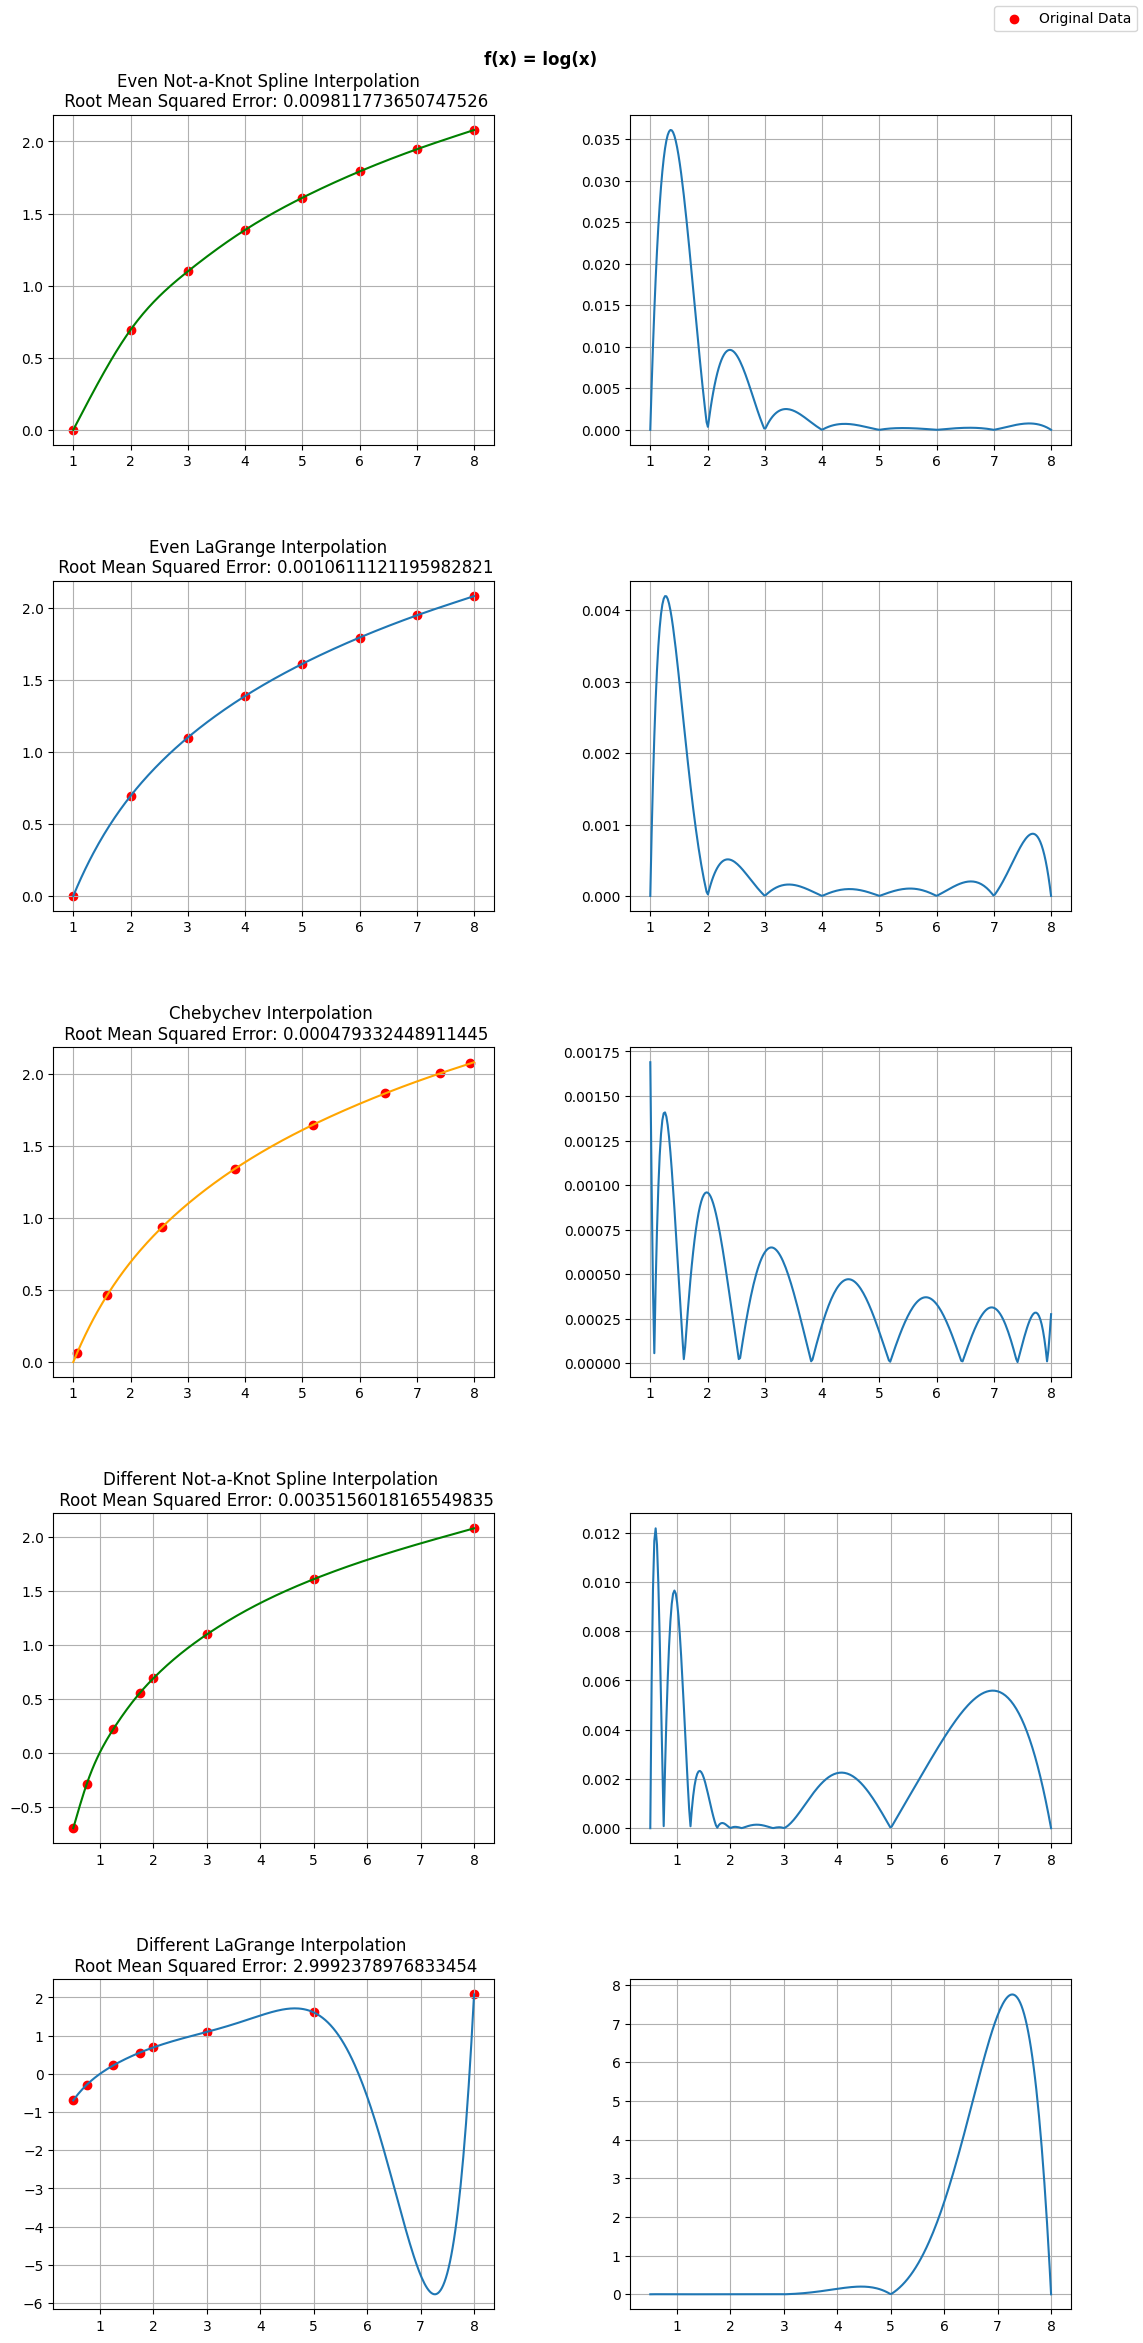

In [9]:
x_even = np.array( [ 1., 2., 3., 4., 5., 6., 7., 8.])
y_even = f_5(x_even)
x_odd = np.array( [ 0.5, 0.75, 1.25, 1.75, 2., 3., 5., 8.])
y_odd = f_5(x_odd)


b_even, c_even, d_even = not_a_knot_spline(x_even, y_even)
b_odd, c_odd, d_odd = not_a_knot_spline(x_odd, y_odd)

x_even_spline = np.linspace(min(x_even), max(x_even), 300)
y_even_spline = np.array([evaluate_spline(x_even, y_even, x, b_even, c_even, d_even) for x in x_even_spline])

x_even_LG = np.linspace(min(x_even), max(x_even), 300)
y_even_LG = np.array([lagrange_interpolation(x_even, y_even, x) for x in x_even_LG])

x_C = np.linspace(min(x_even), max(x_even), 300)
y_C = np.array([chebychev_interpolation(f_5, 8, 1, 8, x) for x in x_C])

x_odd_spline = np.linspace(min(x_odd), max(x_odd), 300)
y_odd_spline = np.array([evaluate_spline(x_odd, y_odd, x, b_odd, c_odd, d_odd) for x in x_odd_spline])

x_odd_LG = np.linspace(min(x_odd), max(x_odd), 300)
y_odd_LG = np.array([lagrange_interpolation(x_odd, y_odd, x) for x in x_odd_LG])


figure, axis = plt.subplots(5, 2, figsize=(12,24))
axis[0][0].scatter(x_even, y_even, color='red', label='Original Data')
axis[1][0].scatter(x_even, y_even, color='red', )
axis[2][0].scatter(chebychev_nodes(8, 1, 8), f_5(chebychev_nodes(8, 1, 8)), color='red', )
axis[3][0].scatter(x_odd, y_odd, color='red', )
axis[4][0].scatter(x_odd, y_odd, color='red', )

axis[0][0].plot(x_even_spline, y_even_spline, color='green')
axis[1][0].plot(x_even_LG, y_even_LG)
axis[2][0].plot(x_C, y_C, color = 'orange')
axis[3][0].plot(x_odd_spline, y_odd_spline, color='green')
axis[4][0].plot(x_odd_LG, y_odd_LG)

axis[0][0].set_title(f'Even Not-a-Knot Spline Interpolation  \n Root Mean Squared Error: {RMSE(f_5(x_even_spline), y_even_spline)}')
axis[1][0].set_title(f'Even LaGrange Interpolation  \n Root Mean Squared Error: {RMSE(f_5(x_even_LG), y_even_LG)}')
axis[2][0].set_title(f'Chebychev Interpolation \n Root Mean Squared Error: {RMSE(f_5(x_C), y_C)}')
axis[3][0].set_title(f'Different Not-a-Knot Spline Interpolation \n Root Mean Squared Error: {RMSE(f_5(x_odd_spline), y_odd_spline)}')
axis[4][0].set_title(f'Different LaGrange Interpolation \n Root Mean Squared Error: {RMSE(f_5(x_odd_LG), y_odd_LG)}')

axis[0][0].grid(True)
axis[1][0].grid(True)
axis[2][0].grid(True)
axis[3][0].grid(True)
axis[4][0].grid(True)

axis[0][1].plot(x_even_spline, np.abs(y_even_spline-f_5(x_even_spline)))
axis[1][1].plot(x_even_LG, np.abs(y_even_LG-f_5(x_even_LG)))
axis[2][1].plot(x_C, np.abs(y_C-f_5(x_C)))
axis[3][1].plot(x_odd_spline, np.abs(y_odd_spline-f_5(x_odd_spline)))
axis[4][1].plot(x_odd_LG, np.abs(y_odd_LG-f_5(x_odd_LG)))

axis[0][1].grid(True)
axis[1][1].grid(True)
axis[2][1].grid(True)
axis[3][1].grid(True)
axis[4][1].grid(True)


figure.legend()
figure.tight_layout(pad=5.0)

figure.suptitle('f(x) = log(x)', weight='bold')

plt.show()